# **Implementing Decision Tree using Scikit Learn**

### What is decision tree?<br>
> **A decision tree is a popular machine learning algorithm used for both classification and regression tasks. It works by recursively splitting a dataset into subsets based on the value of a single attribute, with the goal of creating a tree-like model of decisions and their possible consequences.**

> **The tree structure consists of nodes, edges, and leaves, where each node represents a test on a specific attribute, each edge represents the outcome of that test, and each leaf node represents a decision or prediction. The tree is built by selecting the attribute that best splits the data at each node, based on some criterion such as Information Gain or Gini impurity.**

> **Decision trees are popular due to their simplicity and interpretability, which makes them useful for exploratory data analysis, feature selection, and decision-making tasks in various domains. They are also a popular basis for more complex ensemble methods like Random Forests and Gradient Boosted Trees.**

**Let us consider the following example of a Decision Tree -**<br>
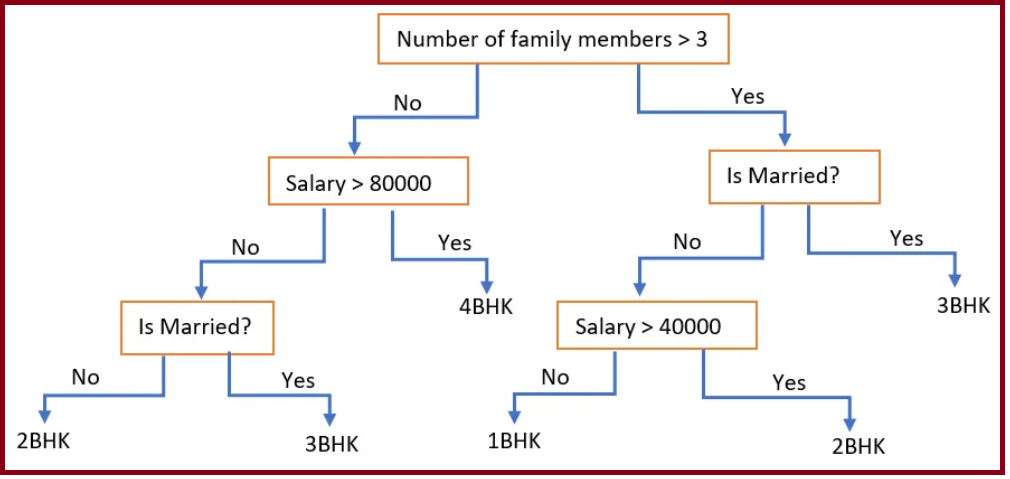

### Bagging
**Bagging attempts to reduce the chance overfitting complex models.**
* It trains a large number of "strong" learners in parallel.
* A strong learner is a model that's relatively unconstrained.
* Bagging then combines all the strong learners together in order to "smooth out" their predictions.

### Boosting
**Boosting attempts to improve the predictive flexibility of simple models.**
* It trains a large number of "weak" learners in sequence.
* A weak learner is a constrained model (i.e., you could limit the max depth of each decision tree).
* Each one in the sequence focuses on learning from the mistakes of the one before it.
* Boosting then combines all the weak learners into a single strong learner.

### Is Decision tree an example of Bagging or Boosting?
> Decision tree is not an example of bagging or boosting. Instead, decision tree is a base algorithm that can be used in both bagging and boosting techniques to create ensemble models.

> Bagging (Bootstrap Aggregating) is a technique that involves creating multiple copies of a base model (such as decision trees) trained on different subsets of the training data. Each model is trained independently, and their predictions are aggregated to produce the final prediction. This helps to reduce overfitting and improve the stability and accuracy of the model.

> Boosting, on the other hand, is a technique that involves creating an ensemble model by sequentially adding weak learners (such as decision trees) that are trained on weighted versions of the training data. Each subsequent model is trained to correct the errors of the previous models, and their predictions are combined to produce the final prediction. Boosting can be effective in improving the accuracy of the model on difficult or imbalanced datasets.

> So, decision trees can be used as base models in both bagging and boosting techniques to create ensemble models. For example, Random Forest is an ensemble learning method that uses bagging to improve the accuracy and stability of decision trees, while Gradient Boosting is an ensemble learning method that uses boosting to improve the performance of decision trees.

### What are the different types of decision trees?
There are several types of decision trees, some of which are:
* **Binary Decision Tree:** In this type of decision tree, each internal node has two child nodes, and each leaf node represents a class label or a decision.
* **Multi-way Decision Tree:** In this type of decision tree, each internal node can have more than two child nodes, and each leaf node represents a class label or a decision.
* **Regression Tree:** A regression tree is used when the target variable is continuous or numeric. Instead of class labels, the leaf nodes of the tree contain numeric values that predict the target variable.
* **Classification Tree:** A classification tree is used when the target variable is categorical or discrete. The leaf nodes of the tree represent the class labels, and the decision path from the root to the leaf nodes represents the classification rules.
* **Cost-Sensitive Decision Tree:** A cost-sensitive decision tree is a type of decision tree that considers the cost of misclassification errors when making decisions. The tree is constructed to minimize the total cost of misclassification, rather than just the error rate.
* **Univariate Decision Tree:** An univariate decision tree is a type of decision tree that splits the data based on a single feature or attribute at each node.
* **Multivariate Decision Tree:** A multivariate decision tree is a type of decision tree that splits the data based on multiple features or attributes at each node.

Each type of decision tree has its own strengths and weaknesses and is suited for different types of problems. The choice of which type of decision tree to use depends on the nature of the data and the specific problem at hand.






### CART and ID3
> **CART (Classification and Regression Trees)** and **ID3 (Iterative Dichotomiser 3)** are two popular decision tree algorithms used in machine learning.
> CART is a type of decision tree algorithm that can be used for both classification and regression problems. CART constructs binary decision trees by recursively partitioning the data into subsets based on the values of the input variables. At each node, the algorithm selects the variable that gives the best split (based on a measure of impurity reduction such as Gini index or entropy) and splits the data into two child nodes. The process is repeated until a stopping criterion is met, such as reaching a maximum depth or a minimum number of samples per leaf.

> ID3 is a decision tree algorithm that is specifically designed for classification problems. ID3 constructs decision trees by recursively partitioning the data based on the values of the input variables that best discriminate between the classes. At each node, the algorithm selects the variable that gives the highest information gain (based on the entropy measure) and splits the data into child nodes corresponding to the possible values of the variable. The process is repeated until all the samples are correctly classified, or until a stopping criterion is met.

> CART is more flexible and can handle both classification and regression tasks, while ID3 is more specialized for classification tasks. CART can construct binary decision trees, while ID3 can construct multi-way decision trees. CART uses a measure of impurity reduction (such as Gini index or entropy) to select the best split, while ID3 uses information gain based on the entropy measure. Both algorithms have their own advantages and disadvantages and can be applied to different types of problems.

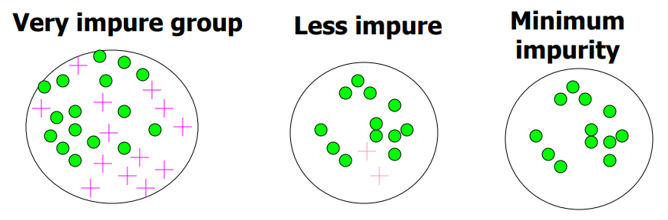

### Information Gain, Entropy and Gain
> **Information gain** is a commonly used criterion for selecting the best attribute to split a dataset in a decision tree. It is a measure of the reduction in entropy (or uncertainty) achieved by splitting the dataset on a particular attribute.

> **Entropy** is a measure of the disorder or randomness in a dataset, and it is calculated as the sum of the negative log probabilities of each class label present in the data. When a dataset is split based on an attribute, the resulting subsets may be more ordered or less random than the original dataset, depending on how well the attribute discriminates between different classes.

> **Gain** is a term commonly used in decision tree algorithms as a measure of the usefulness of a feature or attribute in classifying data. Specifically, gain is the reduction in impurity achieved by splitting the data based on a given feature.

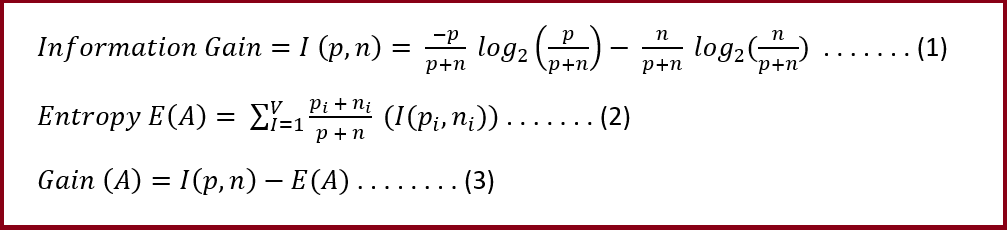

**Here is an example regarding calculations of Entropy -**<br>
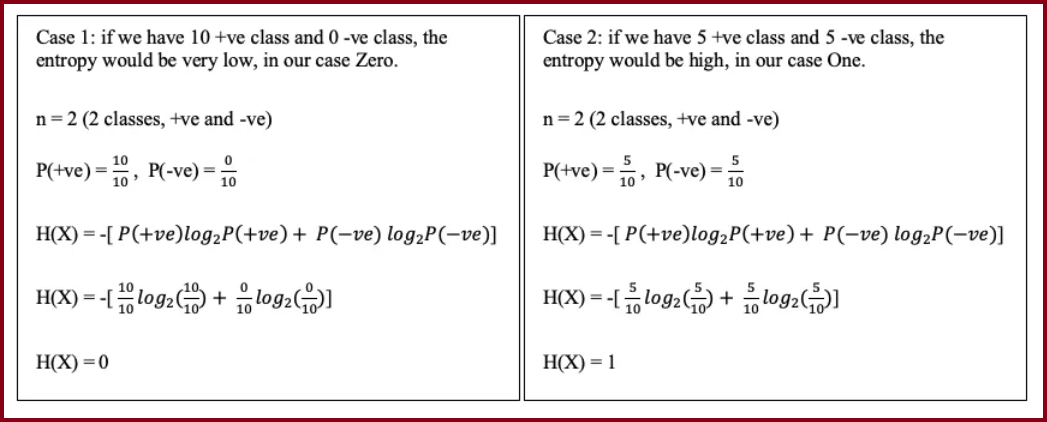

### Let us consider the following "Playtennis" problem and its implementation -
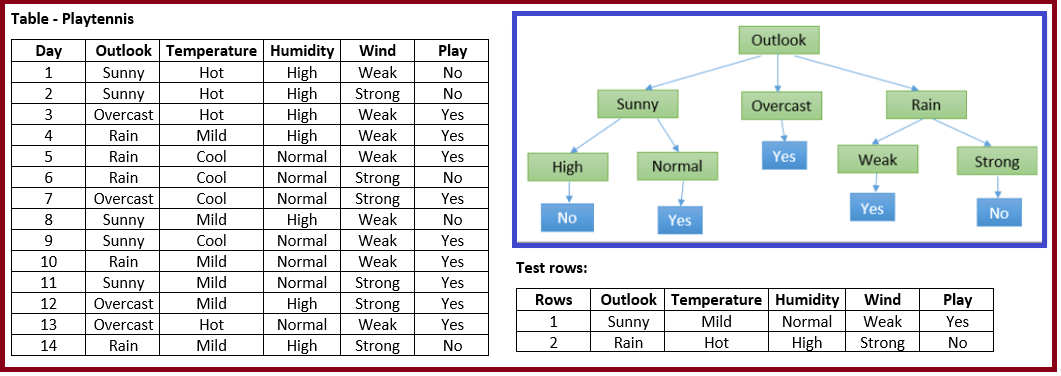

Let us discuss the calculations in details. Reference - E:\Arnab Docs\Machine Learning\Decision Tree\DecisionTree.xlsx

In [85]:
# importing required modules
import numpy as np
import pandas as pd

In [86]:
#Loading the PlayTennis data
PlayTennis = pd.read_csv("e:/datafile/PlayTennis.csv")

In [87]:
print (PlayTennis.shape, type(PlayTennis))
PlayTennis

(14, 5) <class 'pandas.core.frame.DataFrame'>


,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


It is easy to implement Decision Tree with numerical values. We can convert all the non numerical values into numerical values using [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [88]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

PlayTennis['Outlook'] = Le.fit_transform(PlayTennis['Outlook'])
PlayTennis['Temperature'] = Le.fit_transform(PlayTennis['Temperature'])
PlayTennis['Humidity'] = Le.fit_transform(PlayTennis['Humidity'])
PlayTennis['Wind'] = Le.fit_transform(PlayTennis['Wind'])
PlayTennis['Play'] = Le.fit_transform(PlayTennis['Play'])

In [89]:
print (PlayTennis.shape)
PlayTennis

(14, 5)


,Outlook,Temperature,Humidity,Wind,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


* Lets split the training data and its coresponding prediction values.
* y - holds all the decisions.
* X - holds the training data.

In [90]:
y = PlayTennis['Play']
X = PlayTennis.drop(['Play'], axis = 1)

In [91]:
print (X.shape, type(X))
X

(14, 4) <class 'pandas.core.frame.DataFrame'>


,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [92]:
print (y.shape, type(y))
y

(14,) <class 'pandas.core.series.Series'>


0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int32

In [93]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(0.4444444444444444, 0.9, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 

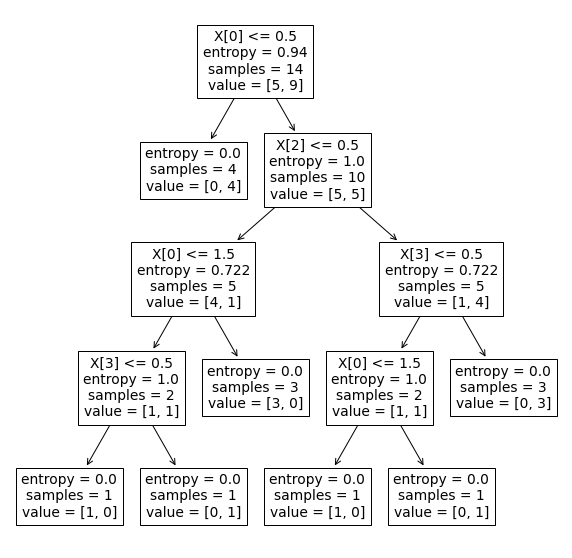

In [94]:
# We can visualize the tree using tree.plot_tree
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 10))     # for resizing the graph
tree.plot_tree(clf)

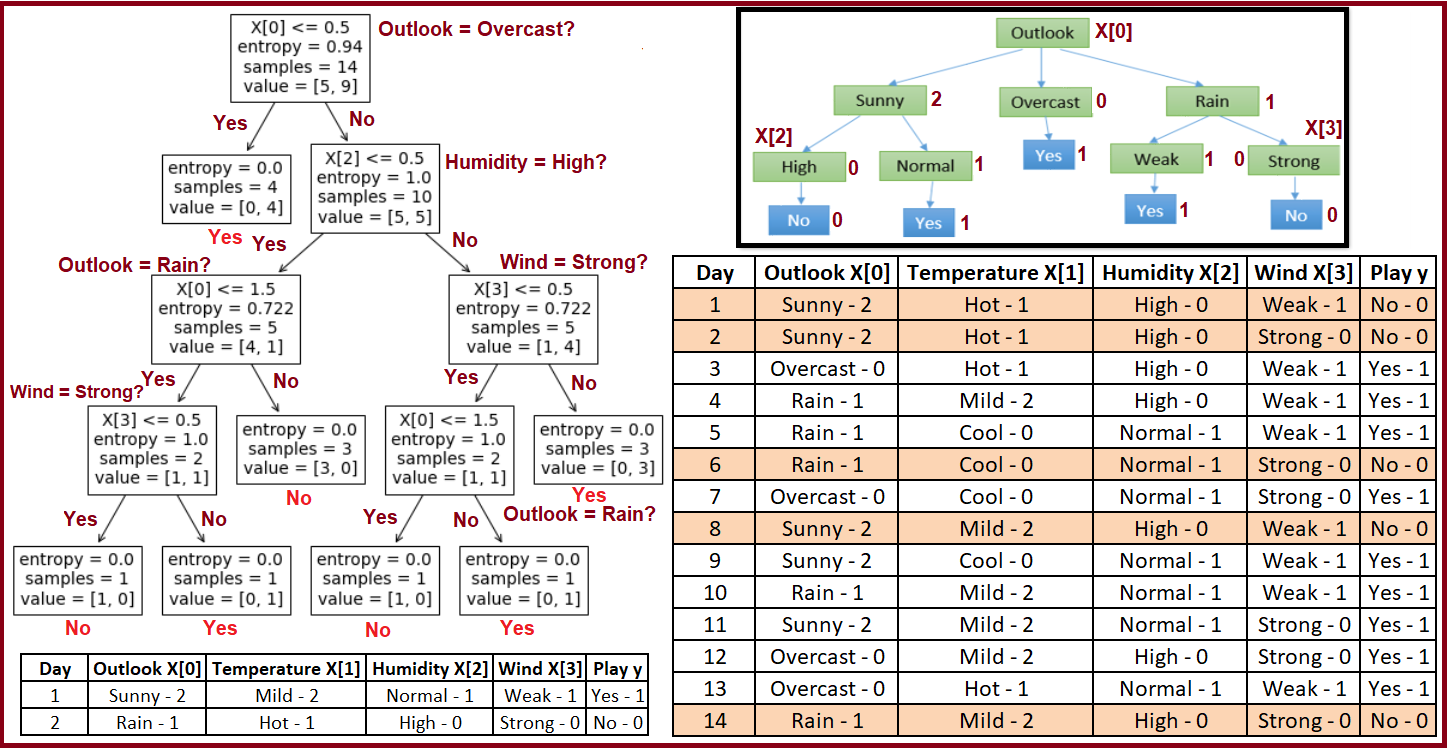

[GraphViz](https://www.graphviz.org/) gives a better and clearer Graph.

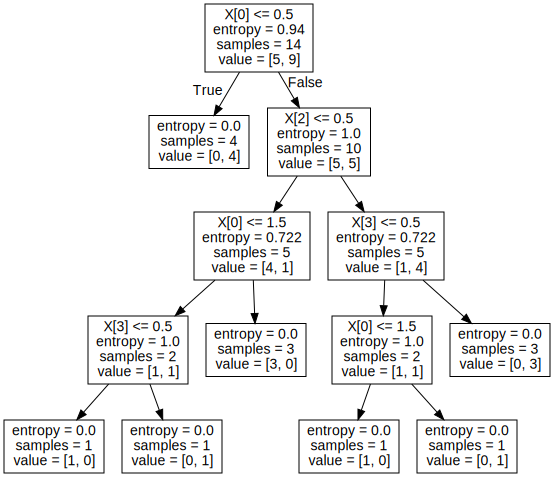

In [95]:
# !pip install graphviz
import graphviz 
dot_data = tree.export_graphviz(clf, out_file = None) 
graph = graphviz.Source(dot_data) 
graph

In the above graph,

* X[0] -> Outlook
* X[1] -> Temperature
* X[2] -> Humidity
* X[3] -> Wind

values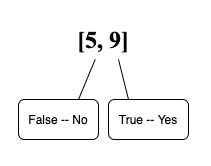



We can just make the model to predict our train data.

In [96]:
# The predictions are stored in X_pred
X_pred = clf.predict(X)

In [97]:
# verifying if the model has predicted it all right.
X_pred == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: Play, dtype: bool

**Test Data -**<br>
<table border = 4 align = left>
    <tr><th>Rows</th><th>Outlook</th><th>Temperature</th><th>Humidity</th><th>Wind</th><th>Play</th></tr>
    <tr><th>1</th><td>Sunny</td><td>Mild</td><td>Normal</td><td>Weak</td><td>Yes</td></tr>
    <tr><th>2</th><td>Rain</td><td>Hot</td><td>High</td><td>Strong</td><td>No</td></tr>
</table>

In [100]:
X_input = [[2, 2, 1, 1] , [1, 1, 0, 0]]
df_columns = ["Outlook", "Temperature", "Humidity", "Wind"]
X_input_df = pd.DataFrame(data = X_input, columns = df_columns)
X_pred = clf.predict(X_input_df)
print (X_pred, type(X_pred))

[1 0] <class 'numpy.ndarray'>
